In [7]:
!pip install tpot

In [8]:
# Library yang digunakan
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tpot import TPOTClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
#Load Dataset dan menampilkan nya
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**EKSPLORASI DATA**

---


  Pada tahap ini akan dilakukan beberapa hal:
*   Menampilkan info tipe data pada masing-masing kolom
*   menghitung data yang tidak bernilai null/isnull
*   Menampilkan data numerical dan kategorikal
*   menampilkan korelasi antar data menggunakan heatmap apakah data tersebut korelasi positif,negatif atau netral






In [ ]:
#menampilkan info tipe data pada masing" kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
# Menghitung data yang tidak null 
features_fill = pd.DataFrame(100 * df.count().sort_values() / df.shape[0])
features_fill.reset_index(inplace=True)
features_fill.columns = ['Features', 'Fill (%)']

In [15]:
# List numerical
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
# List categorigal
categorical_features = df.select_dtypes(include='object').columns.tolist()
# Output data numerik
print('Numerical:', numerical_features) 
# Outputdata kategorik
print('\nCategorical:', categorical_features) 

Numerical: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [16]:
df['labelRainTomorrow'] = df['RainTomorrow'].replace({'Yes':1,'No':0})
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,labelRainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0


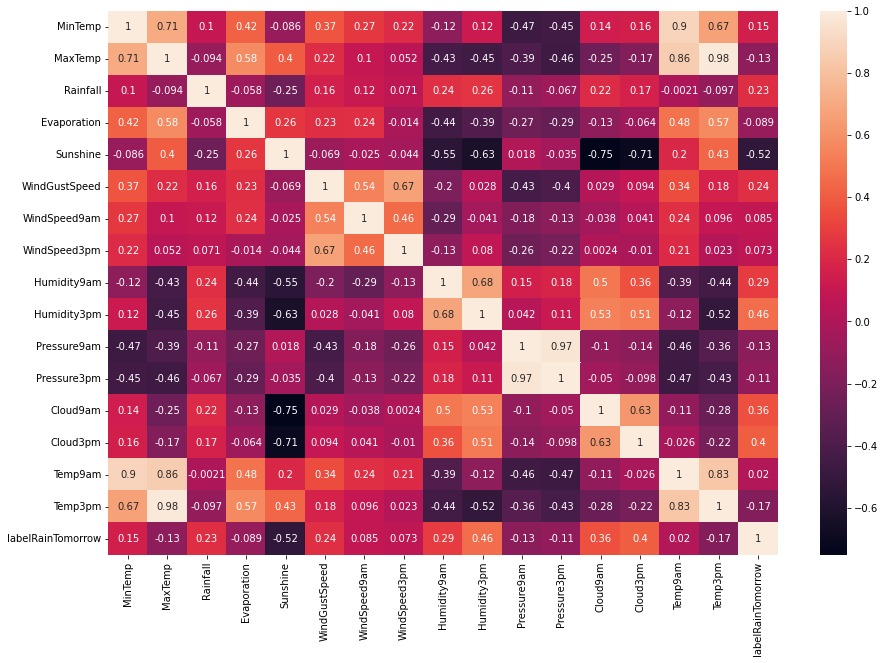

In [17]:
# Menampilkan korelasi antar data menggunakan library heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

PREPROCESSING

---
Pada tahap ini akan dilakukan:

*   Drop data duplikat
*   Drop Null data
*   Menampilkan dan Drop Outliers
*   Menyederhanakan Dimensi









In [21]:
# Drop data duplikat
df_drop = df.copy()
df_new = df_drop.drop_duplicates()
df_new.reset_index(drop=True, inplace=True)
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,labelRainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21895,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,No,No,0.0
21896,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,No,Yes,1.0
21897,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,Yes,Yes,1.0
21898,2011-02-19,NorfolkIsland,22.2,26.9,4.2,5.2,10.7,E,43.0,E,ESE,26.0,30.0,80.0,69.0,1015.9,1014.5,4.0,6.0,25.2,25.2,Yes,No,0.0


In [23]:
# Drop data yang memiliki nilai null
df_new = df_drop.dropna()
df_new.reset_index(drop=True, inplace=True)
df_new

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,labelRainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4582,2011-02-15,NorfolkIsland,21.2,25.6,0.4,5.6,9.1,ESE,48.0,ESE,ESE,26.0,30.0,82.0,72.0,1018.2,1017.0,3.0,4.0,23.0,24.2,No,No,0.0
4583,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,No,No,0.0
4584,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,No,Yes,1.0
4585,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,Yes,Yes,1.0


In [25]:
# Menampilkan jumlah data dengan outliers
print("jumlah data dengan outliers:", df_drop.shape)

# Drop outliers
df_new = df_new[(np.abs(stats.zscore(df_new.select_dtypes(include=np.number))) < 3).all(axis=1)]
print("jumlah data tanpa outliers:", df_new.shape)
df_new.reset_index(drop=True, inplace=True)
df_new

jumlah data dengan outliers: (0, 24)
jumlah data tanpa outliers: (4354, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,labelRainTomorrow
0,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0
1,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0
2,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0
3,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0
4,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,2011-02-15,NorfolkIsland,21.2,25.6,0.4,5.6,9.1,ESE,48.0,ESE,ESE,26.0,30.0,82.0,72.0,1018.2,1017.0,3.0,4.0,23.0,24.2,No,No,0.0
4350,2011-02-16,NorfolkIsland,21.9,26.1,0.0,6.4,8.2,ESE,46.0,ESE,ESE,24.0,28.0,75.0,69.0,1018.2,1016.4,7.0,6.0,24.2,25.6,No,No,0.0
4351,2011-02-17,NorfolkIsland,22.0,27.0,0.0,4.0,4.0,ESE,48.0,ESE,ESE,20.0,28.0,79.0,82.0,1015.9,1014.3,7.0,7.0,25.4,25.0,No,Yes,1.0
4352,2011-02-18,NorfolkIsland,22.9,28.0,3.4,3.8,2.0,ENE,37.0,E,ENE,17.0,26.0,89.0,77.0,1014.7,1014.0,7.0,7.0,25.1,27.0,Yes,Yes,1.0


In [26]:
#Dilakukan Perubahan Dimensi dengan cara menggabungkan 2 kolom menjadi 1 dengan cara mengambil nilai rata-rata

df['Humidity'] = (df['Humidity9am'] + df['Humidity3pm'])/2
df['Pressure'] = (df['Pressure9am'] + df['Pressure3pm'])/2
df['Cloud'] = (df['Cloud9am'] + df['Cloud3pm'])/2

In [27]:
fitur_numerikal = ['Sunshine', 'Humidity', 'Pressure', 'Cloud']
target = ['RainTomorrow']

df = pd.concat([df[fitur_numerikal], df[target]], axis=1)
df.head()

,Sunshine,Humidity,Pressure,Cloud,RainTomorrow
0,NaN,46.5,1007.40,NaN,No
1,NaN,34.5,1009.20,NaN,No
2,NaN,34.0,1008.15,NaN,No
3,NaN,30.5,1015.20,NaN,No
4,NaN,57.5,1008.40,7.5,No


MODELLING

In [38]:
# dilakukan normalisasi dengan menggunakan minmaxscaler
df['RainTomorrow_label'] = df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)
X = df[fitur_numerikal]
y = df.iloc[:,-1:]
mm = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print('Data X_train:')
display(X_train)

print('\nData X_test:')
display(X_test)

Data X_train:


,Sunshine,Humidity,Pressure,Cloud
1360,NaN,72.5,1015.00,8.0
6289,1.4,30.0,1004.90,7.0
9940,9.2,68.0,1023.90,2.5
3804,NaN,53.5,1012.45,NaN
1,NaN,34.5,1009.20,NaN
...,...,...,...,...
8451,NaN,42.0,1017.50,2.0
21215,5.4,65.5,1017.25,5.5
16385,NaN,63.0,NaN,3.5
822,NaN,61.0,1012.25,NaN



Data X_test:


,Sunshine,Humidity,Pressure,Cloud
8986,NaN,22.0,1018.80,NaN
18950,NaN,60.5,1028.15,NaN
20217,NaN,79.5,1020.20,NaN
5395,NaN,55.0,NaN,NaN
13159,0.0,90.0,1010.00,8.0
...,...,...,...,...
5872,NaN,62.5,1002.90,NaN
16458,NaN,52.0,NaN,0.5
18282,NaN,85.5,1026.05,NaN
3542,NaN,70.5,1018.40,NaN


In [29]:
# dilatih menggunakan algoritma Tpot
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)
pipeline_optimizer.fit(mm.fit_transform(X_train), y_train)

Imputing missing values in feature set


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8339204174820611

Generation 2 - Current best internal CV score: 0.8339204174820611

Generation 3 - Current best internal CV score: 0.8339204174820611

Generation 4 - Current best internal CV score: 0.8339204174820611

Generation 5 - Current best internal CV score: 0.8339204174820611

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.001, max_depth=9, min_child_weight=7, n_estimators=100, n_jobs=1, subsample=0.45, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [30]:
y_pred = pipeline_optimizer.predict(mm.fit_transform(X_test))

Imputing missing values in feature set


EVALUASI

In [31]:
print('Classification Report Pipeline')
print(classification_report(y_test, y_pred))

print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Classification Report Pipeline
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      5142
           1       0.69      0.39      0.50      1428

    accuracy                           0.83      6570
   macro avg       0.77      0.67      0.70      6570
weighted avg       0.81      0.83      0.81      6570

Confusion Matrix
[[4892  250]
 [ 870  558]]


In [32]:
pipeline_optimizer.export('tpot_pipeline.py')

In [35]:
dfRes = pd.DataFrame()
dfRes = X_test
dfRes['Target'] = y_test
dfRes['Predict'] = y_pred
dfRes.to_csv('newDataset.csv', index=False)
dfRes

,Sunshine,Humidity,Pressure,Cloud,Target,Predict
5140,NaN,31.0,1005.45,NaN,0,0
18241,NaN,64.5,1022.30,NaN,1,0
10411,10.8,54.0,1025.65,1.0,0,0
19901,NaN,77.5,1019.40,NaN,0,0
15196,NaN,82.0,NaN,8.0,1,1
...,...,...,...,...,...,...
11659,NaN,59.5,1022.70,NaN,0,0
15690,NaN,49.5,NaN,1.0,0,0
1920,NaN,89.0,1017.85,5.0,0,1
12609,9.5,60.5,1020.60,0.5,0,0
